# Clusters EastWest airlines

In [30]:
#importing required lib's
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.cluster import KMeans,DBSCAN
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler,minmax_scale,LabelEncoder


In [31]:
#reading file
airlines_df=pd.read_excel('EastWestAirlines.xlsx',sheet_name='data')
airlines_df.head()


,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,1,28143,0,1,1,1,174,1,0,0,7000,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1


In [32]:
#Finding null and dtypes of variables
airlines_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3999 entries, 0 to 3998
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   ID#                3999 non-null   int64
 1   Balance            3999 non-null   int64
 2   Qual_miles         3999 non-null   int64
 3   cc1_miles          3999 non-null   int64
 4   cc2_miles          3999 non-null   int64
 5   cc3_miles          3999 non-null   int64
 6   Bonus_miles        3999 non-null   int64
 7   Bonus_trans        3999 non-null   int64
 8   Flight_miles_12mo  3999 non-null   int64
 9   Flight_trans_12    3999 non-null   int64
 10  Days_since_enroll  3999 non-null   int64
 11  Award?             3999 non-null   int64
dtypes: int64(12)
memory usage: 375.0 KB


In [34]:
# as i found that there are no null values and data types 

airlines_df=airlines_df.drop(['ID#'],axis=1)

airlines_df

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,28143,0,1,1,1,174,1,0,0,7000,0
1,19244,0,1,1,1,215,2,0,0,6968,0
2,41354,0,1,1,1,4123,4,0,0,7034,0
3,14776,0,1,1,1,500,1,0,0,6952,0
4,97752,0,4,1,1,43300,26,2077,4,6935,1
...,...,...,...,...,...,...,...,...,...,...,...
3994,18476,0,1,1,1,8525,4,200,1,1403,1
3995,64385,0,1,1,1,981,5,0,0,1395,1
3996,73597,0,3,1,1,25447,8,0,0,1402,1
3997,54899,0,1,1,1,500,1,500,1,1401,0


In [35]:
#Reducing the variable size by preforing PCA
pca=PCA(2).fit_transform(airlines_df)

<AxesSubplot:>

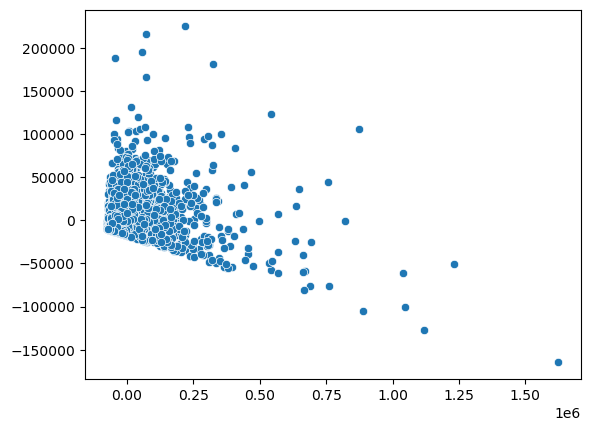

In [36]:
#ploting scatter plot for representing variables
sns.scatterplot(x=pca[:,0],y=pca[:,1])

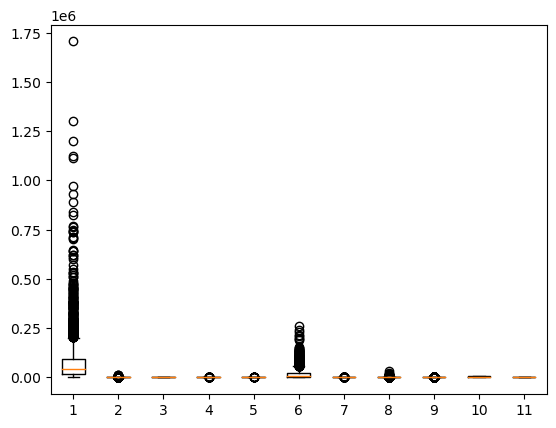

In [43]:
#ploting boxplot to visulize the outliers
plt.boxplot(airlines_df);#there are more outliers

In [39]:
#Scaling the Data
from sklearn.preprocessing import StandardScaler
scale=StandardScaler().fit_transform(airlines_df)

In [40]:
#creating the model
kmean=KMeans(n_clusters=2,init='k-means++',random_state=0)
model=kmean.fit_predict(scale)
model

array([1, 1, 1, ..., 1, 1, 1])

In [44]:
#Calculate the silhoutte score
print('if those parts are divided into two clusters',silhouette_score(scale,kmean.labels_,metric='euclidean'))

if those parts are divided into two clusters 0.3256981835090824


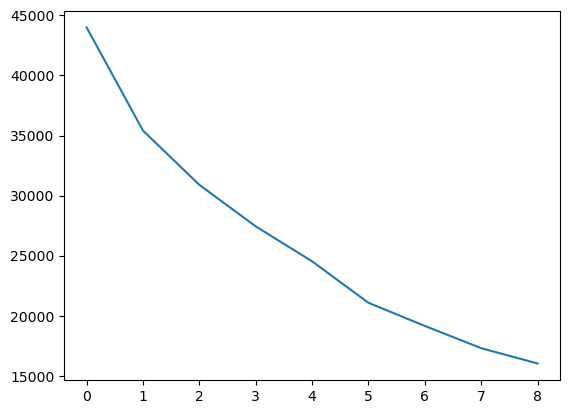

In [45]:
#lets find the ideal number of clusters 
wcss=[]
for i in range(1,10):
    kmean=KMeans(n_clusters=i,init='k-means++',random_state=0)
    kmean.fit_predict(scale)
    wcss.append(kmean.inertia_)
    
plt.plot(wcss)

In [94]:
#i think ideal number of clusters are 2

kmean=KMeans(n_clusters=2,init='k-means++',random_state=0)
model=kmean.fit_predict(scale)
model

array([1, 1, 1, ..., 1, 1, 1])

In [68]:
print('if those parts are divided into two clusters',silhouette_score(scale,kmean.labels_,metric='euclidean'))

if those parts are divided into two clusters 0.3256981835090824


In [69]:
airlines_df['clusters']=model
airlines_df

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,clusters
0,28143,0,1,1,1,174,1,0,0,7000,0,1
1,19244,0,1,1,1,215,2,0,0,6968,0,1
2,41354,0,1,1,1,4123,4,0,0,7034,0,1
3,14776,0,1,1,1,500,1,0,0,6952,0,1
4,97752,0,4,1,1,43300,26,2077,4,6935,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
3994,18476,0,1,1,1,8525,4,200,1,1403,1,1
3995,64385,0,1,1,1,981,5,0,0,1395,1,1
3996,73597,0,3,1,1,25447,8,0,0,1402,1,1
3997,54899,0,1,1,1,500,1,500,1,1401,0,1


In [70]:
a=pca[model==0]
b=pca[model==1]

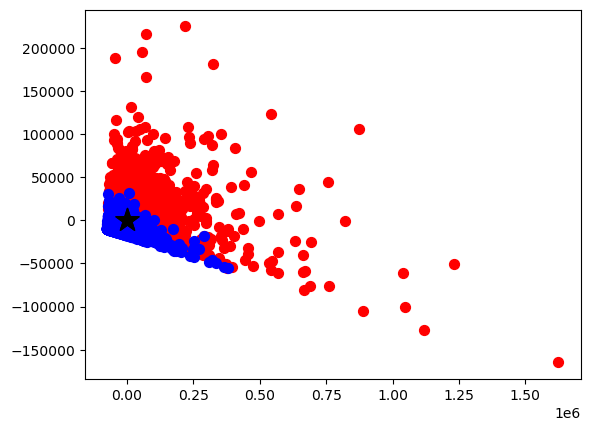

In [75]:
plt.scatter(a[:,0],a[:,1],s=50,c='r')
plt.scatter(b[:,0],b[:,1],s=50,c='b')
plt.scatter(kmean.cluster_centers_[:,0],kmean.cluster_centers_[:,1],marker='*',c='k',s=300)

In [137]:
#because of too much outlier present in the model so i am using DBSCAN
model=DBSCAN(eps=3,min_samples=3,metric='euclidean').fit_predict(scale)

In [138]:
model

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [139]:
airlines_df['cluster']=model
airlines_df

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,clusters,cluster
0,28143,0,1,1,1,174,1,0,0,7000,0,1,0
1,19244,0,1,1,1,215,2,0,0,6968,0,1,0
2,41354,0,1,1,1,4123,4,0,0,7034,0,1,0
3,14776,0,1,1,1,500,1,0,0,6952,0,1,0
4,97752,0,4,1,1,43300,26,2077,4,6935,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3994,18476,0,1,1,1,8525,4,200,1,1403,1,1,0
3995,64385,0,1,1,1,981,5,0,0,1395,1,1,0
3996,73597,0,3,1,1,25447,8,0,0,1402,1,1,0
3997,54899,0,1,1,1,500,1,500,1,1401,0,1,0


In [157]:
outliers=airlines_df[airlines_df['cluster']==3]
outliers.head()

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,clusters,cluster
384,28193,0,5,1,4,103456,32,0,0,6980,1,0,3
1244,166465,0,4,1,4,98717,30,0,0,5531,0,0,3
1878,128302,0,5,1,4,132263,32,400,2,4103,1,0,3
2251,125679,0,3,1,4,68151,27,650,1,3683,0,0,3
2955,61474,0,1,1,4,47717,14,0,0,3354,0,0,3
